## Glosario
---

***status***:
- "Default" = 0
- "Fully Paid" = 1 
- "Charged Off" = 2

***term***:
- "36 months" = 0
- "60 months" = 1

***home_ownership***:
- "MORTGAGE" = 0
- "RENT" = 1
- "OTHER" = 2
- "OWN" = 3

***outcome***:
- "default" = 0
- "paid off" = 1

***emp_len_***:
- " < 1 Year" = 0
- " > 1 Year" = 1

***purpose***:
- debt_consolidation = 11
- credit_card = 10
- other = 9
- home_improvement = 8
- small_business = 7
- major_purchase = 6
- car = 5
- medical = 4
- wedding = 3
- moving = 2
- house = 1
- vacation = 0

In [26]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
df = pd.read_csv("./loan_data_modified_np.csv")
df.head()  # muestra 5 por defecto

,index_,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,23063,1,9000,0,50000,17.11,7.08600,9093,74.5,debt_consolidation,...,1,1,6,5.4,1,6,debt_consolidation,OWN,1,0.45
1,23065,1,2500,0,33600,3.39,2.73250,3375,7.8,medical,...,1,1,15,6.2,1,11,medical,OWN,1,0.60
2,23067,1,6000,0,24000,5.75,10.54150,2327,43.1,wedding,...,1,1,6,5.0,1,2,other,OWN,1,0.55
3,23077,1,7000,0,24000,14.85,10.82900,268,0.7,major_purchase,...,1,1,7,6.6,1,1,major_purchase,OWN,1,0.50
4,3774,2,8000,0,48000,22.25,6.99025,8784,73.2,debt_consolidation,...,0,0,14,3.6,0,4,debt_consolidation,RENT,1,0.45


In [28]:
df.shape

(45342, 21)

Vamos a eliminar las columnas ***purpose_*** y ***home_*** que se repiten. Esto lo hacemos ahora con fines didacticos, pero lo pudimos haber hecho en PostgreSQL como hicimos con el resto.

In [29]:
df.drop(columns=['purpose_', 'home_', 'index_'], inplace=True)

In [30]:
df.shape

(45342, 18)

In [31]:
df.describe()

,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,home_ownership,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,emp_len_,borrower_score
count,45342.000000,45342.000000,45342.00000,4.534200e+04,45342.000000,45342.000000,4.534200e+04,45342.000000,45342.000000,45342.000000,45342.000000,45342.000000,45342.000000,45342.000000,45342.000000,45342.000000,45342.000000
mean,1.490252,13154.814521,0.24871,6.821170e+04,16.133731,8.032225,1.485745e+04,56.051804,0.705505,0.857527,0.912090,10.413105,4.599087,0.500000,6.321115,0.960831,0.499006
std,0.509567,8088.533525,0.43227,5.623902e+04,7.594881,4.264034,2.008254e+04,25.430276,0.838923,0.349538,0.283167,4.696616,1.479069,0.500006,3.752789,0.193999,0.128687
min,0.000000,500.000000,0.00000,2.000000e+03,0.000000,0.048890,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.050000
25%,1.000000,7000.000000,0.00000,4.200000e+04,10.460000,4.671572,5.657000e+03,37.900000,0.000000,1.000000,1.000000,7.000000,3.600000,0.000000,3.000000,1.000000,0.400000
50%,1.000000,11500.000000,0.00000,6.000000e+04,16.020000,7.499355,1.076550e+04,58.400000,1.000000,1.000000,1.000000,10.000000,4.800000,0.500000,6.000000,1.000000,0.500000
75%,2.000000,18000.000000,0.00000,8.100000e+04,21.590000,10.940575,1.861350e+04,76.400000,1.000000,1.000000,1.000000,13.000000,5.800000,1.000000,11.000000,1.000000,0.600000
max,2.000000,35000.000000,1.00000,7.141778e+06,38.860000,43.545600,1.743266e+06,128.100000,3.000000,1.000000,1.000000,76.000000,7.000000,1.000000,11.000000,1.000000,1.000000


In [32]:
df['purpose'].value_counts()

purpose
debt_consolidation    25570
credit_card            7688
other                  3585
home_improvement       2609
small_business         1513
major_purchase         1281
car                     779
medical                 648
wedding                 545
moving                  456
house                   368
vacation                300
Name: count, dtype: int64

Ahora procedemos a pasar los string de la columna ***purpose*** a valores numericos. Esto lo hacemos ahora con fines didacticos, pero lo pudimos haber hecho en PostgreSQL como hicimos con el resto.

In [33]:
dic_purpose = {
    'debt_consolidation' : 11,
    'credit_card' : 10,
    'other' : 9,
    'home_improvement' : 8,
    'small_business' : 7,
    'major_purchase' : 6,
    'car' : 5,
    'medical' : 4,
    'wedding' : 3,
    'moving' : 2,
    'house' : 1,
    'vacation' : 0
}
df['purpose'] = df['purpose'].map(dic_purpose)
df['purpose']

0        11
1         4
2         3
3         6
4        11
         ..
45337    11
45338    11
45339     9
45340     4
45341    11
Name: purpose, Length: 45342, dtype: int64

Ahora vamos a crear un ***mapa de calor*** para evaluar la ***correlacion*** (por eso colocamos ***`.corr()`***, se puede colocar otros valores o directamente solo el dataframe) entre las variables.

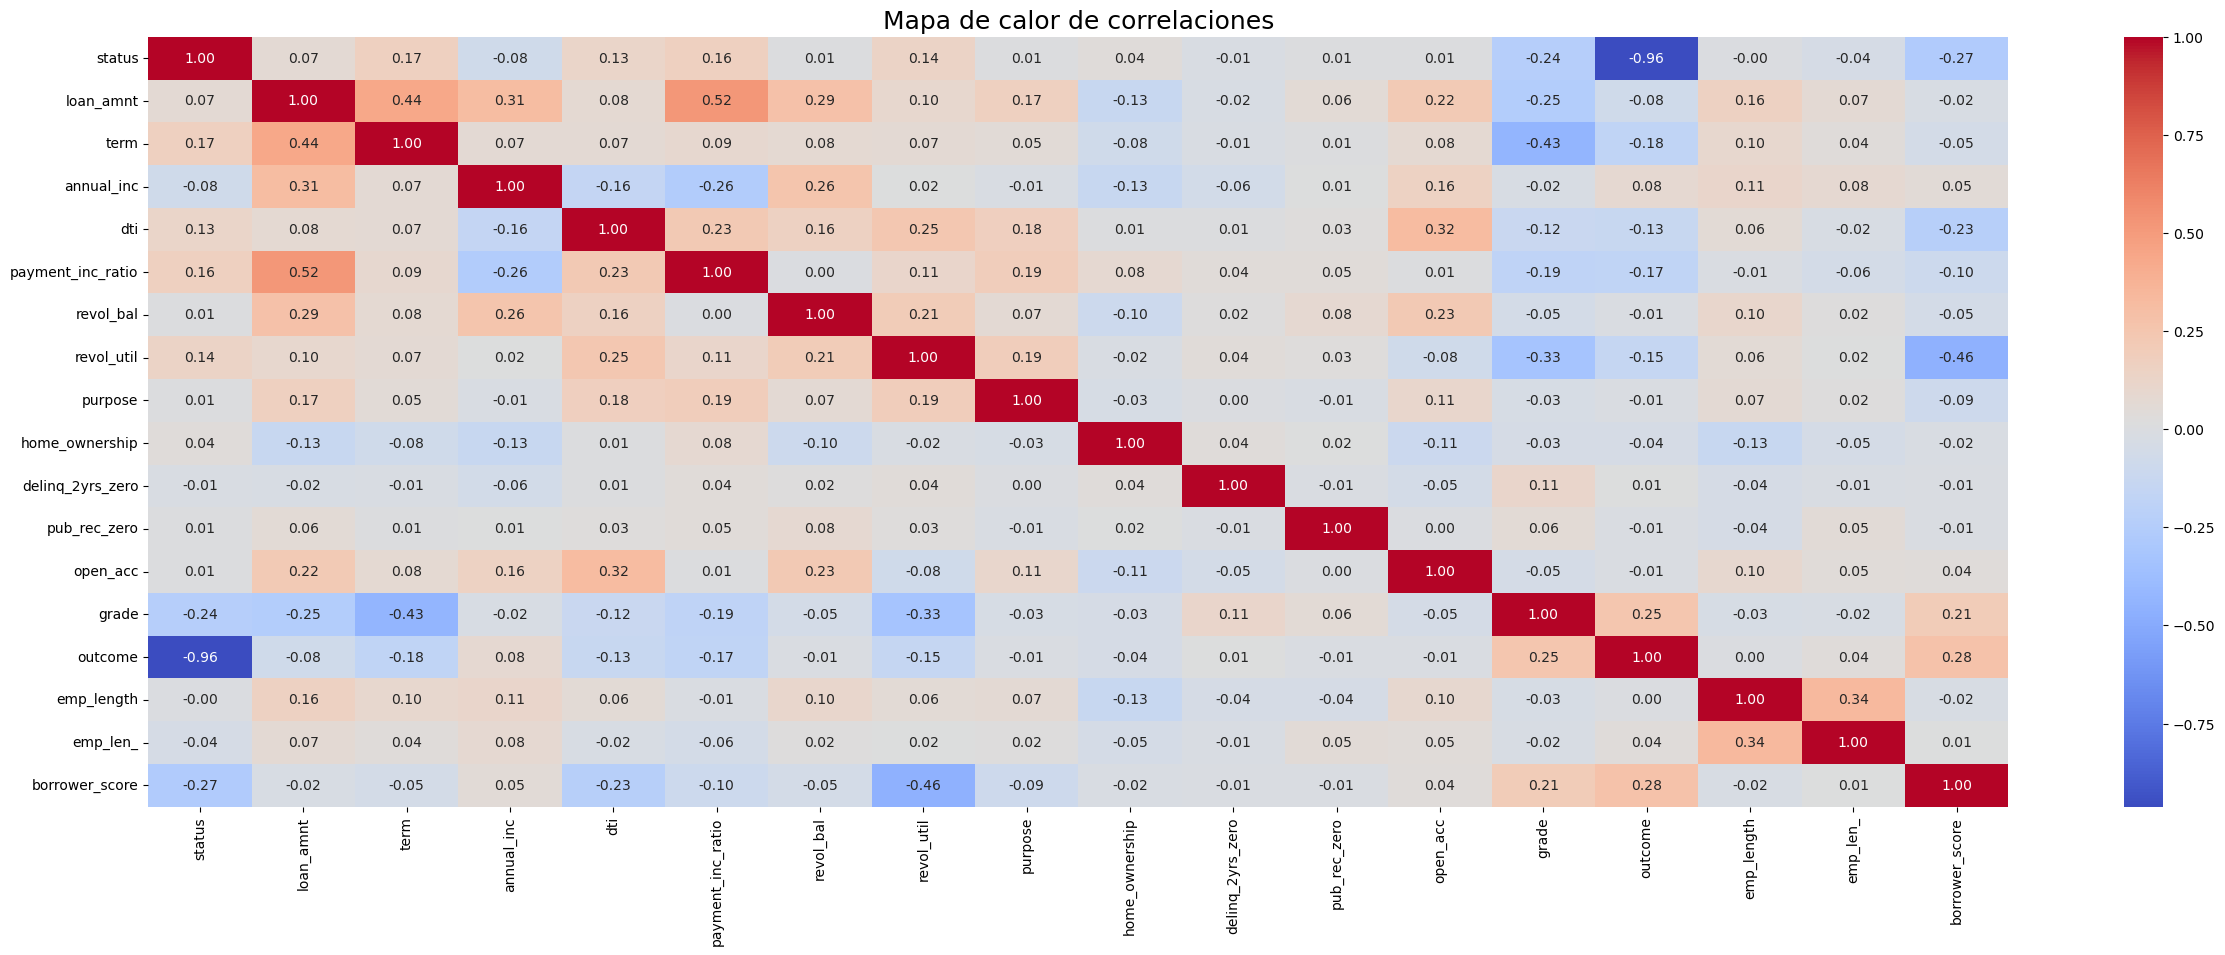

In [38]:
plt.figure(figsize=(30,10))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlaciones', fontsize=18)
plt.show()

Observamos que las columnas ***outcome*** y ***status*** tienen una ***correlacion negativa*** muy elevada. Y viendo los valores de cada columna se puede determinar que tienen valores repetidos, es decir una columna puede explicar a la otra y a esto se lo conoce como ***MULTICOLINEALIDAD***.

Por lo tanto ahora procederemos a eliminar la columna ***status***. La de ***outcome*** la dejamos ya que es la que vamos a querer predecir.

In [40]:
df.shape

(45342, 18)

In [41]:
df.drop(columns=['status'], inplace=True)

In [42]:
df.shape

(45342, 17)

Ahora que ya tenemo nuestros datos procesados y formateados, procederemos a definir que columnas seran nuestros ***PREDICTORES (X)*** y cuales nuestros ***OUTCOME (Y)***.

In [43]:
df.columns

Index(['loan_amnt', 'term', 'annual_inc', 'dti', 'payment_inc_ratio',
       'revol_bal', 'revol_util', 'purpose', 'home_ownership',
       'delinq_2yrs_zero', 'pub_rec_zero', 'open_acc', 'grade', 'outcome',
       'emp_length', 'emp_len_', 'borrower_score'],
      dtype='object')

In [44]:
predictors = ['loan_amnt', 'term', 'annual_inc', 'dti', 'payment_inc_ratio',
       'revol_bal', 'revol_util', 'purpose', 'home_ownership',
       'delinq_2yrs_zero', 'pub_rec_zero', 'open_acc', 'grade',
       'emp_length', 'emp_len_', 'borrower_score']
outcomes = 'outcome'

In [45]:
X = df[predictors]
Y = df[outcomes]

Una vez definidos, procedemos a estandarizar los datos:

In [48]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.51367288, -0.57536388, -0.32383024, ..., -0.08556799,
         0.20190526, -0.38082177],
       [-1.31728848, -0.57536388, -0.61544591, ...,  1.24678915,
         0.20190526,  0.78480596],
       [-0.88457239, -0.57536388, -0.78614776, ..., -1.15145371,
         0.20190526,  0.39626339],
       ...,
       [-0.84130078, -0.57536388, -0.85727354, ..., -1.41792513,
         0.20190526, -0.38082177],
       [-0.91857151, -0.57536388,  1.98775738, ...,  0.71384629,
         0.20190526, -0.38082177],
       [-0.26949738, -0.57536388,  0.12070584, ..., -0.08556799,
         0.20190526, -0.76936435]])

Una vez estandarizados pasamos a crear nuestros grupos de datos para ***test*** y para ***train***.

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=7,test_size=0.2)

Ahora pasamos a crear el modelo para entrenarlo.

In [66]:
K = 19
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

Y luego calculamos las metricas para poder evaluar nuestro modelo.

In [67]:
# Exactitud:
accuracy_knn = metrics.accuracy_score(y_test,y_predict)
# Precision
precision_knn = metrics.precision_score(y_test,y_predict)
# Sensibilidad (Recall o True Positive Rate)
recall_knn = metrics.recall_score(y_test,y_predict)
# Valor F1 (F1 Score) (media de la precision y la sensibilidad)
f1_knn = metrics.f1_score(y_test,y_predict)
# Matriz de confusion
conf_matrix = metrics.confusion_matrix(y_test,y_predict)
# Especificidad (Specificity o True negative rate)
TN = conf_matrix[0,0] # verdaderos negativos
FP = conf_matrix[0,1] # falsos positivos
specificity_knn = TN/(TN+FP)

Para poder visualizar mejor las mismas realizaremos un ***heatmap** para la matriz de confusion y un ***grafico de barras*** para el resto de las metricas.

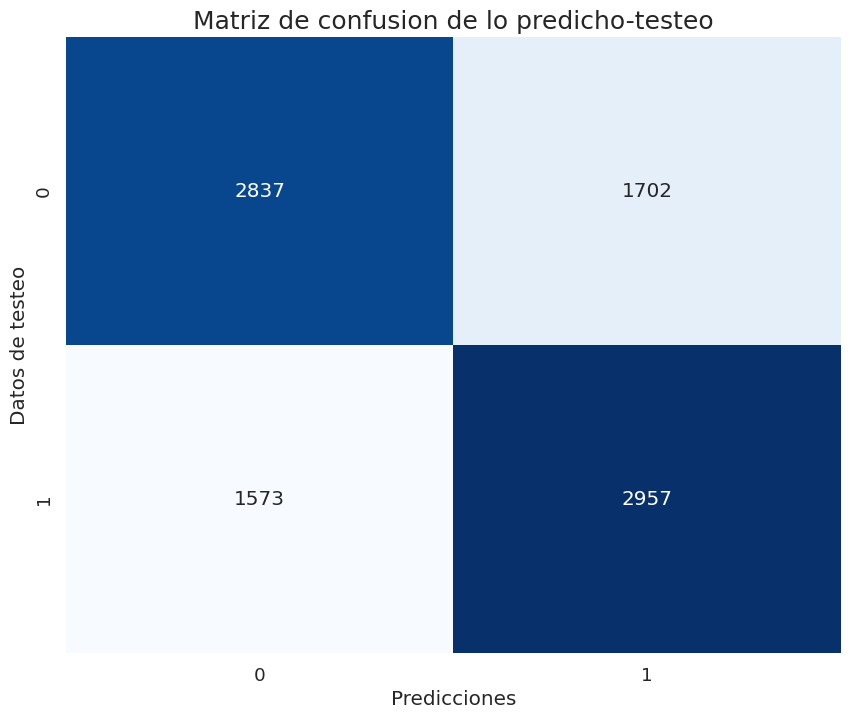

In [69]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel("Predicciones")
plt.ylabel("Datos de testeo")
plt.title('Matriz de confusion de lo predicho-testeo', fontsize=18)
plt.show()

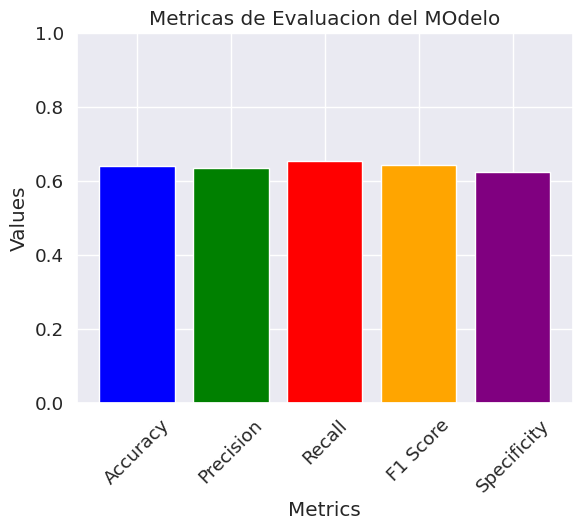

In [71]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity']
values = [accuracy_knn, precision_knn, recall_knn, f1_knn, specificity_knn]

plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.title('Metricas de Evaluacion del MOdelo')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0,1)  # establecer el rango del eje y de 0 a 1 para las metricas de 0 a 1
plt.xticks(rotation=45)  # rotar las etiquetas del eje x para mayor claridad
plt.show()